# Computing Approximations for AVMs

The purpose of this notebook is to illustrate the use of the functions provided in `approximations.py` to compute approximations for the quasi-equilibria of AVMs with given parameters. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from approximations import *

Let's compute and visualize the approximations for $c = 4$ under the rewire-to-random model. We'll compute for 11 values of alpha. 

Note that computing the approximations may throw some warnings related to numerical issues in the root-finding algorithm. This correspond to subcritical parameter regimes and (I believe) can be safely ignored. 

In [21]:
c = 4
n_steps = 11
A = np.linspace(0, 1, n_steps)

dfs = [approx(u, c, 'random', n_steps = n_steps) for u in np.linspace(0, 1, 101)]
df = pd.concat(dfs)

/home/pchodrow/AVM/py/approximations.py:58: RuntimeWarning: divide by zero encountered in true_divide
  C = c*(x / np.array([u[0], u[0], u[1], u[1]]))
/home/pchodrow/AVM/py/approximations.py:72: RuntimeWarning: invalid value encountered in subtract
  EJ = e*(k_0 - EK) + j_0
/home/pchodrow/AVM/py/approximations.py:73: RuntimeWarning: invalid value encountered in subtract
  ER = r*(EJ - j_0)
/home/pchodrow/AVM/py/approximations.py:74: RuntimeWarning: invalid value encountered in subtract
  ES = s*(k_0 - EK - EJ + j_0)
/home/pchodrow/AVM/py/approximations.py:74: RuntimeWarning: invalid value encountered in add
  ES = s*(k_0 - EK - EJ + j_0)
/home/pchodrow/AVM/py/approximations.py:77: RuntimeWarning: invalid value encountered in subtract
  EJ_ = e*(k_0 - EK_) + j_0
/home/pchodrow/AVM/py/approximations.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  scaling = (xx - (x[1] + x[2]))/xx
/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:163: RuntimeWarning: 

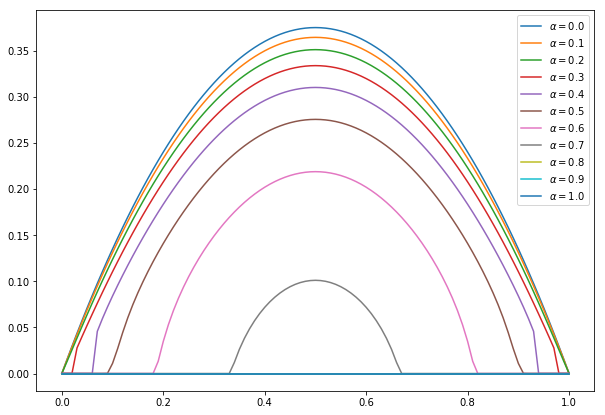

In [22]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)

for alpha in A:
    sub_df = df[df['alpha'] == alpha]
    plt.plot(sub_df['u'], sub_df['v'], label = r"$\alpha = $" + str(round(alpha, 1)))
    plt.legend()